In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression

#  Import and read the tables
mortgages_df=pd.read_excel("/content/Data_Table_Mortgages.xlsx")
mortgages_df.head()


,Quarters,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013Q1,0.37,214203,0.320000
1,2013Q2,0.35,212978,0.310000
2,2013Q3,0.35,226172,0.311882
3,2013Q4,0.35,223413,0.315286
4,2014Q1,0.37,225005,0.305352


In [2]:
# Extract the year from the 'Quarters' column
mortgages_df['Years'] = mortgages_df['Quarters'].apply(lambda x: x[:4])

# Group the data by year and aggregate the data for each year
annual_data = mortgages_df.groupby(['Years']).mean().reset_index()

# Print the annual data
annual_data

,Years,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013,0.3550,219191.50,0.314292
1,2014,0.3500,231196.75,0.290257
2,2015,0.3525,247453.25,0.274011
3,2016,0.3500,266337.50,0.279614
4,2017,0.3125,279651.75,0.248447
5,2018,0.2875,277114.00,0.243891
6,2019,0.2950,276762.25,0.200000
7,2020,0.2800,303598.50,0.200000
8,2021,0.2150,354406.25,0.200000
9,2022,0.1600,370037.00,0.150000


In [3]:
annual_data.dtypes

Years                                  object
Mortgage_delinquency_rate             float64
Average_Value_New_Loans               float64
Residential_Mortgage_Arrears_Rates    float64
dtype: object

In [4]:
annual_data

,Years,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013,0.3550,219191.50,0.314292
1,2014,0.3500,231196.75,0.290257
2,2015,0.3525,247453.25,0.274011
3,2016,0.3500,266337.50,0.279614
4,2017,0.3125,279651.75,0.248447
5,2018,0.2875,277114.00,0.243891
6,2019,0.2950,276762.25,0.200000
7,2020,0.2800,303598.50,0.200000
8,2021,0.2150,354406.25,0.200000
9,2022,0.1600,370037.00,0.150000


In [5]:
# Save the aggregated data back to the file
annual_data.to_csv("/content/Annual_Data")

In [6]:
# Check for missing values
annual_data.isna().sum()

Years                                 0
Mortgage_delinquency_rate             0
Average_Value_New_Loans               0
Residential_Mortgage_Arrears_Rates    0
dtype: int64

In [7]:
# Import Housing_indicators
housing_indicators_df =pd.read_excel("/content/Housing_Market_Indicators.xlsx")
housing_indicators_df

,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposal_Income_Percent_Change
0,2006,60100,2.002025,67.033333,6.3,6.089716
1,2007,61500,2.138384,67.441667,6.0,3.896337
2,2008,63100,2.370271,67.550000,6.1,4.113306
3,2009,63300,0.299467,67.083333,8.3,2.423067
4,2010,62300,1.776872,66.933333,8.1,3.497968
5,2011,62800,2.912135,66.700000,7.5,1.489839
6,2012,64400,1.515678,66.516667,7.3,2.695355
7,2013,64600,0.938292,66.458333,7.1,3.182510
8,2014,66300,1.906636,65.991667,6.9,1.224499
9,2015,66400,1.125241,65.850000,6.9,3.360780


In [8]:
# Check for missing values
housing_indicators_df.isna().sum()

Years                                  0
Real_Median_Household_Income           0
Consumer_Price_Index_Percent_Change    3
Labour_Force_Participation_Rate        3
Unemployment_Rate                      3
Real_Disposal_Income_Percent_Change    4
dtype: int64

In [9]:
# Handle missing values. We're unable to find the actual values for some of these and we can't drop them either 
#So in this case we're making an exception and including the mean as a way to handle the missing values.  
housing_indicators_cleaned = housing_indicators_df.fillna(housing_indicators_df.mean())

In [10]:
housing_indicators_cleaned

,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposal_Income_Percent_Change
0,2006,60100,2.002025,67.033333,6.300000,6.089716
1,2007,61500,2.138384,67.441667,6.000000,3.896337
2,2008,63100,2.370271,67.550000,6.100000,4.113306
3,2009,63300,0.299467,67.083333,8.300000,2.423067
4,2010,62300,1.776872,66.933333,8.100000,3.497968
5,2011,62800,2.912135,66.700000,7.500000,1.489839
6,2012,64400,1.515678,66.516667,7.300000,2.695355
7,2013,64600,0.938292,66.458333,7.100000,3.182510
8,2014,66300,1.906636,65.991667,6.900000,1.224499
9,2015,66400,1.125241,65.850000,6.900000,3.360780


In [11]:
# Save the cleaned data back to the file
housing_indicators_cleaned.to_csv("/content/Housing_Indicators")

In [12]:
# Read in the two csv files
Annual_Data= pd.read_csv("/content/Annual_Data")
HI_df= pd.read_csv("/content/Housing_Indicators")

In [15]:
# Drop the year column and Merge the two dataframes on the "Year" column
Annual_Data = Annual_Data.reset_index(drop=True)
HI_df = HI_df.reset_index(drop=True)
Mortgage_factors_i= pd.merge(Annual_Data, HI_df, on='Years')
Mortgage_factors_i

,Unnamed: 0_x,Years,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates,Unnamed: 0_y,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposal_Income_Percent_Change
0,0,2013,0.3550,219191.50,0.314292,7,64600,0.938292,66.458333,7.100000,3.182510
1,1,2014,0.3500,231196.75,0.290257,8,66300,1.906636,65.991667,6.900000,1.224499
2,2,2015,0.3525,247453.25,0.274011,9,66400,1.125241,65.850000,6.900000,3.360780
3,3,2016,0.3500,266337.50,0.279614,10,66100,1.428760,65.700000,7.000000,3.197338
4,4,2017,0.3125,279651.75,0.248447,11,68100,1.673978,66.659848,7.045455,3.197338
5,5,2018,0.2875,277114.00,0.243891,12,68400,1.673978,66.659848,7.045455,3.197338
6,6,2019,0.2950,276762.25,0.200000,13,69300,1.673978,66.659848,7.045455,3.197338


In [17]:
Mortgage_factors= Mortgage_factors_i.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)
Mortgage_factors.head()

,Years,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposal_Income_Percent_Change
0,2013,0.3550,219191.50,0.314292,64600,0.938292,66.458333,7.100000,3.182510
1,2014,0.3500,231196.75,0.290257,66300,1.906636,65.991667,6.900000,1.224499
2,2015,0.3525,247453.25,0.274011,66400,1.125241,65.850000,6.900000,3.360780
3,2016,0.3500,266337.50,0.279614,66100,1.428760,65.700000,7.000000,3.197338
4,2017,0.3125,279651.75,0.248447,68100,1.673978,66.659848,7.045455,3.197338


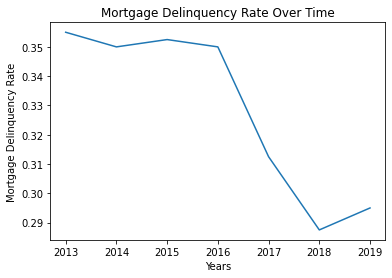

In [18]:
import matplotlib.pyplot as plt
# Line plot showing the Mortgage_delinquency_rate over the Years. It indicates the rate of mortgage delinquency over the years. 
#The mortgage delinquency rate has decreased over the years and reached its lowest in 2021.
plt.plot('Years', 'Mortgage_delinquency_rate', data= Mortgage_factors)
plt.xlabel('Years')
plt.ylabel('Mortgage Delinquency Rate')
plt.title('Mortgage Delinquency Rate Over Time')
plt.show()

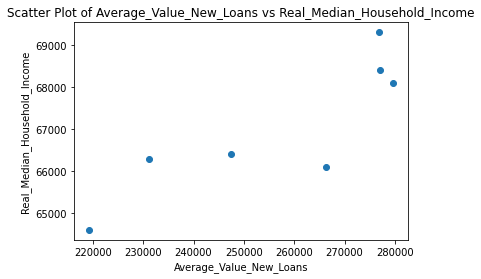

In [19]:
#Scatter Plot: To visualize the relationship between two variables, a scatter plot can be used. 
#For example, plotting the relationship between the "Average_Value_New_Loans" and "Real_Median_Household_Income".
# Since the dots are scattered everywhere we could imply that there is a weak relationship or no relationship between these variables. 

plt.scatter(Mortgage_factors['Average_Value_New_Loans'], Mortgage_factors['Real_Median_Household_Income'])
plt.xlabel('Average_Value_New_Loans')
plt.ylabel('Real_Median_Household_Income')
plt.title('Scatter Plot of Average_Value_New_Loans vs Real_Median_Household_Income')
plt.show()

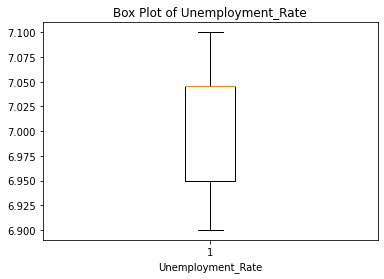

In [20]:
#Box Plot: To visualize the distribution of a variable, a box plot can be used. 
#For example, plotting the distribution of the "Unemployment_Rate".
plt.boxplot(Mortgage_factors['Unemployment_Rate'])
plt.xlabel('Unemployment_Rate')
plt.title('Box Plot of Unemployment_Rate')
plt.show()

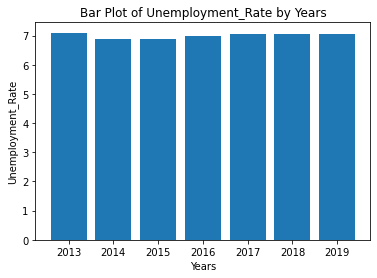

In [21]:
#Bar Plot: To compare the values of a single categorical variable. 
#For example, plotting the "Unemployment_Rate" for each year.
plt.bar(Mortgage_factors['Years'], Mortgage_factors['Unemployment_Rate'])
plt.xlabel('Years')
plt.ylabel('Unemployment_Rate')
plt.title('Bar Plot of Unemployment_Rate by Years')
plt.show()

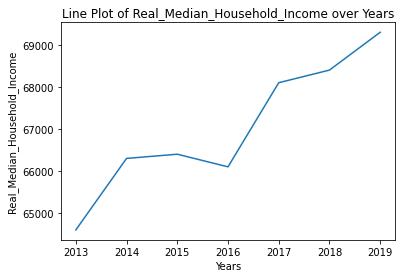

In [22]:
#Line Plot: To visualize the trend of a variable over time. 
#For example, plotting the trend of the "Real_Median_Household_Income" over the years.
plt.plot(Mortgage_factors['Years'], Mortgage_factors['Real_Median_Household_Income'])
plt.xlabel('Years')
plt.ylabel('Real_Median_Household_Income')
plt.title('Line Plot of Real_Median_Household_Income over Years')
plt.show()

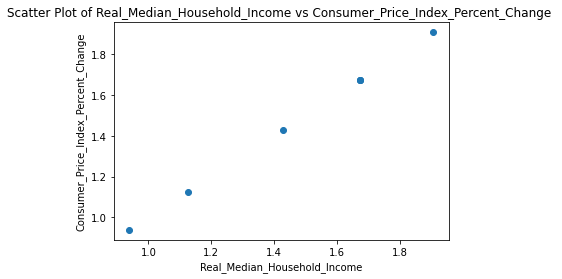

In [23]:
#Scatter plot between the Median income and consumer price index change
plt.scatter(Mortgage_factors['Consumer_Price_Index_Percent_Change'], Mortgage_factors['Consumer_Price_Index_Percent_Change'])
plt.xlabel('Real_Median_Household_Income')
plt.ylabel('Consumer_Price_Index_Percent_Change')
plt.title('Scatter Plot of Real_Median_Household_Income vs Consumer_Price_Index_Percent_Change ')
plt.show()

In [24]:
import seaborn as sns
# calculate the correlation matrix
corr = Mortgage_factors.corr()

In [25]:
# select the absolute correlation matrix
corr_matrix = np.abs(corr)

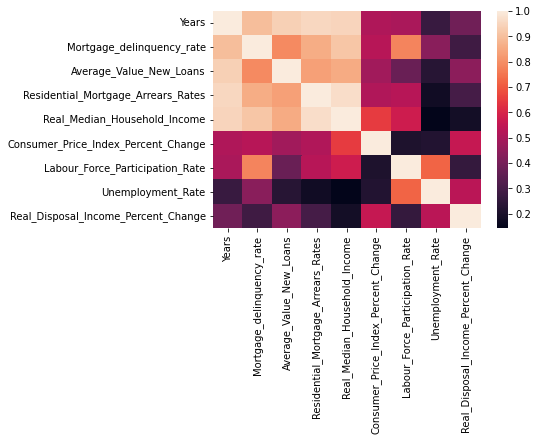

In [26]:
# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix)

In [27]:
# select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-27-fcd61ace4369>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [28]:
# find the columns with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [29]:
# drop the highly correlated columns
features_df = Mortgage_factors.drop(to_drop, axis=1)
features_df

,Years,Mortgage_delinquency_rate,Average_Value_New_Loans,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposal_Income_Percent_Change
0,2013,0.3550,219191.50,0.938292,66.458333,7.100000,3.182510
1,2014,0.3500,231196.75,1.906636,65.991667,6.900000,1.224499
2,2015,0.3525,247453.25,1.125241,65.850000,6.900000,3.360780
3,2016,0.3500,266337.50,1.428760,65.700000,7.000000,3.197338
4,2017,0.3125,279651.75,1.673978,66.659848,7.045455,3.197338
5,2018,0.2875,277114.00,1.673978,66.659848,7.045455,3.197338
6,2019,0.2950,276762.25,1.673978,66.659848,7.045455,3.197338


In [30]:
features_df = pd.DataFrame(features_df, columns=['Years', 'Mortgage_delinquency_rate', 'Average_Value_New_Loans', 'Consumer_Price_Index_Percent_Change',
                                         'Labour_Force_Participation_Rate', 'Unemployment_Rate', 'Real_Disposal_Income_Percent_Change'])


In [31]:
# Scale the data
scaler = StandardScaler()
features_df_scaled = scaler.fit_transform(features_df.drop('Mortgage_delinquency_rate', axis=1))

In [32]:
# Split the data into training and testing sets
X = features_df_scaled
y = features_df['Mortgage_delinquency_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)

In [35]:
# Print accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  -84297.5380255628
